In [1]:
#Start C5T4 Capstone Project train_capstone1,csv file
#numpy,pandas,scipy,math,matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#Estimators
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Model Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Cross Validation
from sklearn.cross_validation import train_test_split

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Get raw data set Credit Card
rawData = pd.read_csv('train_capstone1.csv', header=1)
rawData.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [3]:
#Examine the structure of the data set 
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
LP001002      613 non-null object
Male          600 non-null object
No            610 non-null object
0             598 non-null float64
Graduate      613 non-null object
No.1          581 non-null object
5849          613 non-null int64
0.1           613 non-null float64
Unnamed: 8    592 non-null float64
360           599 non-null float64
1             563 non-null float64
Urban         613 non-null object
Y             613 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 62.3+ KB


In [4]:
#Rename all columns to match the data information
rawData.rename(columns={'LP001002':'Loan_ID','Male':'Gender','No':'Married','0':'Dependents','Graduate':'Education'}, inplace=True)

In [5]:
#Rename all columns to match the data information
rawData.rename(columns={'No.1':'Self_Employed','5849':'ApplicantIncome','0.1':'CoapplicantIncome','Unnamed: 8':'LoanAmount'}, inplace=True)

In [6]:
#Rename all columns to match the data information
rawData.rename(columns={'360':'Loan_Amount_Term','1':'CreditHistory','Urban':'Property_Area','Y':'Loan_Status'}, inplace=True)

In [7]:
#reexamine all columns renamed
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
Loan_ID              613 non-null object
Gender               600 non-null object
Married              610 non-null object
Dependents           598 non-null float64
Education            613 non-null object
Self_Employed        581 non-null object
ApplicantIncome      613 non-null int64
CoapplicantIncome    613 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     599 non-null float64
CreditHistory        563 non-null float64
Property_Area        613 non-null object
Loan_Status          613 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 62.3+ KB


In [8]:
nullrawData = pd.read_csv("train_capstone1.csv")

null_counts = nullrawData.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

In [9]:
#remove rows with empty values
NrawData = rawData.dropna(thresh=13)

In [10]:
#check to see if all null values are removed
NrawData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
CreditHistory        0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
#check NrawData file
NrawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 612
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null float64
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
CreditHistory        480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 52.5+ KB


In [12]:
#Imported libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

In [13]:
#How many people defaulted? This is your dependent variable.
NrawData["Loan_Status"].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [14]:
#How many men and women are there?
NrawData["Gender"].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

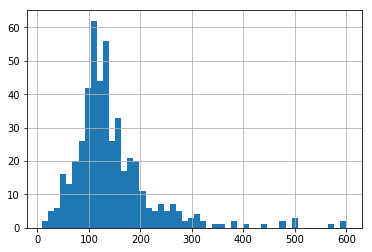

In [15]:
#check data 
NrawData['LoanAmount'].hist(bins=50)

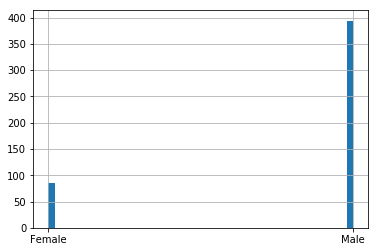

In [16]:
#check data 
NrawData['Gender'].hist(bins=50)

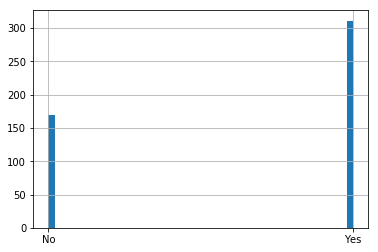

In [17]:
#check data 
NrawData['Married'].hist(bins=50)

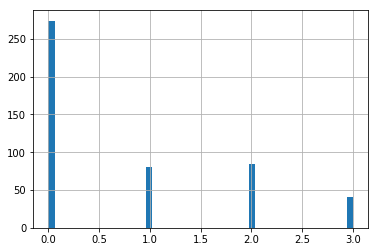

In [18]:
#check data 
NrawData['Dependents'].hist(bins=50)

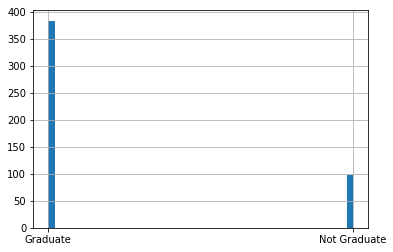

In [19]:
#check data 
NrawData['Education'].hist(bins=50)

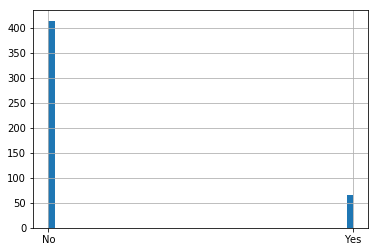

In [20]:
#check data 
NrawData['Self_Employed'].hist(bins=50)

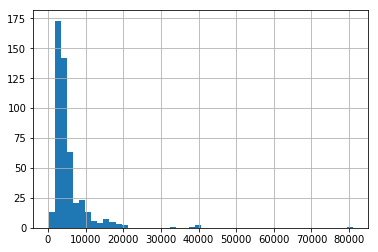

In [21]:
#check data 
NrawData['ApplicantIncome'].hist(bins=50)

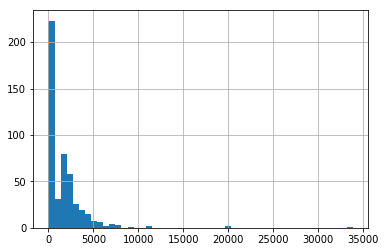

In [22]:
#check data 
NrawData['CoapplicantIncome'].hist(bins=50)

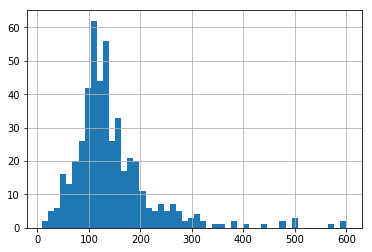

In [23]:
#check data 
NrawData['LoanAmount'].hist(bins=50)

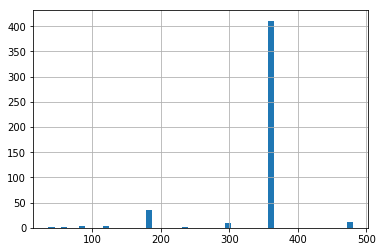

In [24]:
#check data 
NrawData['Loan_Amount_Term'].hist(bins=50)

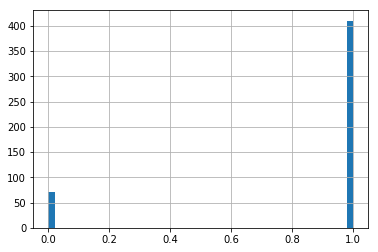

In [25]:
#check data 
NrawData['CreditHistory'].hist(bins=50)

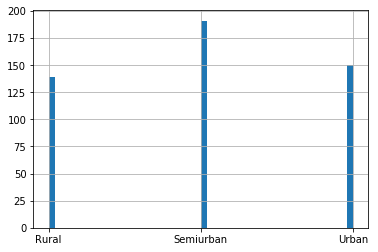

In [26]:
#check data 
NrawData['Property_Area'].hist(bins=50)

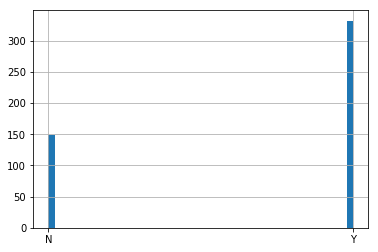

In [27]:
#check data 
NrawData['Loan_Status'].hist(bins=50)

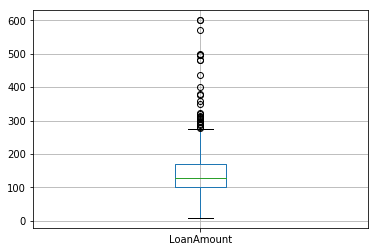

In [28]:
#Box plot 
NrawData.boxplot(column='LoanAmount')

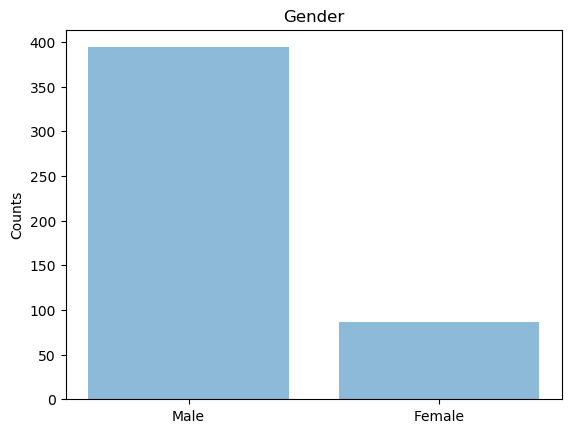

In [29]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Male', 'Female')
y_pos = np.arange(len(objects))
counts = NrawData['Gender'].value_counts()
 
plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Counts')
plt.title('Gender')
plt.show()

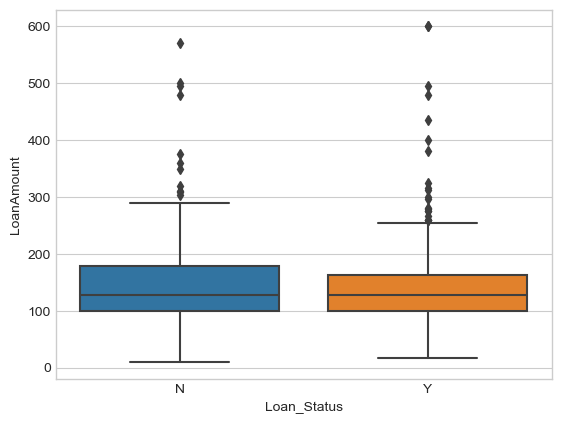

In [30]:
#Import plot styling with Seaborn
#https://blog.insightdatascience.com/data-visualization-in-python-advanced-functionality-in-seaborn-20d217f1a9a6
import seaborn as sns
sns.set_style("whitegrid")
sns.boxplot(x="Loan_Status", y="LoanAmount", data=NrawData)

In [31]:
#import seaborn for EDA plot
import seaborn as sns

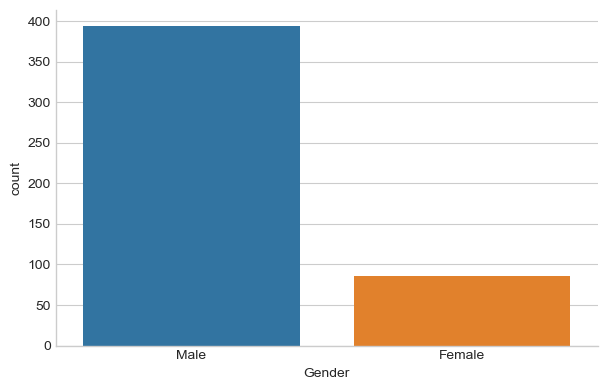

In [32]:
#Instead of group by use seaborn to plot EDUCATION LEVELS BY SEX
fg = sns.factorplot('Gender', data=NrawData, kind='count', aspect=1.5)

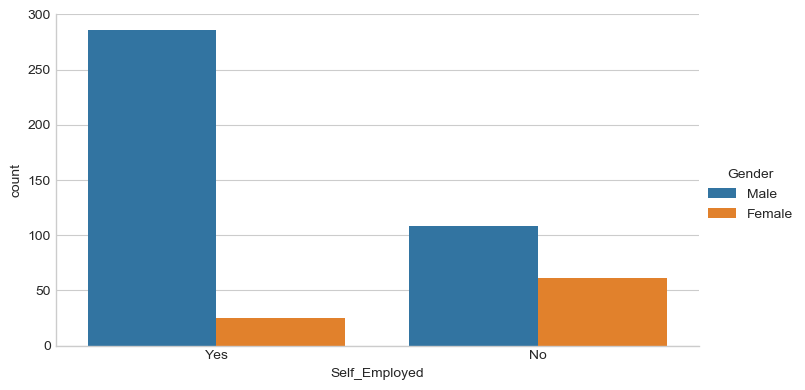

In [33]:
#Again use saeborn to group by Gender and Married Status
import seaborn as sns
g = sns.factorplot('Married', data=NrawData, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('Self_Employed')

In [34]:
#Run crosstabulations of the categorical variables against the dependent variable
pd.crosstab(NrawData['Loan_Status'], NrawData['Gender'])

Gender,Female,Male
Loan_Status,,
N,32,116
Y,54,278


In [35]:
#Try 3 way cross contingency table
pd.crosstab([NrawData.Loan_Status, NrawData.Married], NrawData.Gender, margins=True)

Gender               Female  Male  All
Loan_Status Married                   
N           No           24    40   64
            Yes           8    76   84
Y           No           37    68  105
            Yes          17   210  227
All                      86   394  480

In [36]:
#Try 3 way cross contingency table
pd.crosstab([NrawData.Loan_Status, NrawData.Gender], NrawData.Married, margins=True)

Married              No  Yes  All
Loan_Status Gender               
N           Female   24    8   32
            Male     40   76  116
Y           Female   37   17   54
            Male     68  210  278
All                 169  311  480

In [37]:
#Try 3 way cross contingency table
pd.crosstab([NrawData.Loan_Status, NrawData.Gender], NrawData.Education, margins=True)

Education           Graduate  Not Graduate  All
Loan_Status Gender                             
N           Female        28             4   32
            Male          84            32  116
Y           Female        45             9   54
            Male         226            52  278
All                      383            97  480

In [38]:
#Try 3 way cross contingency table
pd.crosstab([NrawData.Loan_Status, NrawData.Gender], NrawData.Self_Employed, margins=True)

Self_Employed        No  Yes  All
Loan_Status Gender               
N           Female   26    6   32
            Male     99   17  116
Y           Female   48    6   54
            Male    241   37  278
All                 414   66  480

In [39]:
#Try 3 way cross contingency table
pd.crosstab([NrawData.Loan_Status, NrawData.Gender], NrawData.LoanAmount, margins=True)

LoanAmount          9.0  17.0  25.0  26.0  30.0  35.0  36.0  40.0  44.0  45.0  \
Loan_Status Gender                                                              
N           Female    1     0     0     0     0     0     0     0     0     0   
            Male      0     0     0     0     0     1     0     0     0     1   
Y           Female    0     0     0     0     1     0     1     1     1     0   
            Male      0     1     2     1     1     0     0     1     1     1   
All                   1     1     2     1     2     1     1     2     2     2   

LoanAmount         ...   380.0  400.0  436.0  480.0  495.0  496.0  500.0  \
Loan_Status Gender ...                                                     
N           Female ...       0      0      0      0      0      0      0   
            Male   ...       0      0      0      1      1      0      1   
Y           Female ...       0      0      0      0      0      1      0   
            Male   ...       1      1      1      1      0      0      0   
All                ...       1      1      1      2      1      1      1   

LoanAmount          570.0  600.0  All  
Loan_Status Gender                     
N           Female      0      0   32  
            Male        1      0  116  
Y           Female      0      1   54  
            Male        0      1  278  
All                     1      2  480  

[5 rows x 187 columns]

In [40]:
#Summaries to determine variable types
#NrawData["Gender"].describe()
#NrawData["Married"].describe()
#NrawData["Dependents"].describe()
#NrawData["Education"].describe()
#NrawData["Self_Employed"].describe()
#NrawData["ApplicantIncome"].describe()
#NrawData["CoapplicantIncome"].describe()
#NrawData["LoanAmount"].describe()
NrawData.describe()
#NrawData["Loan_Amount_Term"].describe()
#NrawData["CreditHistory"].describe()
#NrawData["Property_Area"].describe()
#NrawData["Loan_Status"].describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,CreditHistory
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.777083,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,1.020815,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000
25%,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,2.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,3.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [ ]:
# Convert to Numeris
#NrawData['Gender_1'] = NrawData['Gender_1'].apply({'Male':1, 'Female':2}).get
#NrawData['Gender_2'] = NrawData['Gender_2'].apply({'No':0,'Yes':1}).get
#NrawData['Married_0'] = NrawData['Married_0'].apply({'Graduate':1,'Not Graduate':2}).get
#NrawData['Married_1'] = NrawData['Married_1'].apply({'No':0, 'Yes':1}).get
#NrawData['Dependents_0.0'] = NrawData['Dependents_0.0'].apply({'Urban':1,'Semiurban':2,'Rural':3}).get
#NrawData['Dependents_1.0'] = NrawData['Dependents_1.0'].apply({'No':0, 'Yes':1}).get
#NrawData['Dependenrs_2.0'] = NrawData['Dependents_2.0'].apply({'Male':1, 'Female':2}).get
#NrawData['Dependents_3,0'] = NrawData['Dependents_3.0'].apply({'No':0,'Yes':1}).get
#NrawData['Education_1'] = NrawData['Education_1'].apply({'Graduate':1,'Not Graduate':2}).get
#NrawData['Education_2'] = NrawData['Education_2'].apply({'No':0, 'Yes':1}).get
#NrawData['Self_Employed_0'] = NrawData['Self_Employed_0'].apply({'Urban':1,'Semiurban':2,'Rural':3}).get
#NrawData['Self_Employed_1'] = NrawData['Self_Employed_1'].apply({'No':0, 'Yes':1}).get
#NrawData['CreditHistory_0.0'] = NrawData['CreditHistory_0.0'].apply({'Male':1, 'Female':2}).get
#NrawData['CreditHistory_1.0'] = NrawData['CreditHistory_1.0'].apply({'No':0,'Yes':1}).get
#NrawData['Property_Area_1] = NrawData['Property_Area_1'].apply({'Graduate':1,'Not Graduate':2}).get
#NrawData['Property_Area_2'] = NrawData['Property_Area_2'].apply({'No':0, 'Yes':1}).get
#NrawData['Property_Area_3'] = NrawData['Property_Area_3'].apply({'Urban':1,'Semiurban':2,'Rural':3}).get
#NrawData['Loan_Status'] = NrawData['Loan_Status'].apply({'No':0, 'Yes':1}).get


In [41]:
#Check NrawData
NrawData.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,CreditHistory,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [42]:
#check cos
cols = NrawData.columns.tolist()
cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'CreditHistory',
 'Property_Area',
 'Loan_Status']

In [43]:
#One-Hot encoding of categorical variables for analysis
#http://pbpython.com/categorical-encoding.html
NrawData = pd.get_dummies(NrawData, columns=["Gender", "Married", "Dependents", "Education", "Self_Employed", "CreditHistory",
                                             "Property_Area", "Loan_Status"], 
         prefix=["Gender", "Married", "Dependents", "Education", "Self_Employed", "CreditHistory", "Property_Area", "Loan_Status"])


In [44]:
cols = NrawData.columns.tolist()
cols

['Loan_ID',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Dependents_0.0',
 'Dependents_1.0',
 'Dependents_2.0',
 'Dependents_3.0',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'CreditHistory_0.0',
 'CreditHistory_1.0',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Loan_Status_N',
 'Loan_Status_Y']

In [45]:
columnsTitles = ['Loan_ID',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Gender_1',
 'Married_0', 
 'Dependents_0.0',
 'Dependents_1.0',
 'Dependents_2.0',
 'Education_0',
 'Self_Employed_0',
 'CreditHistory_0.0',
 'Property_Area_1',
 'Property_Area_2',
 'Loan_Status_N',
 'Loan_Status_Y',                 
 'Gender_2','Married_1','Dependents_3.0','Education_1', 'Self_Employed_1', 'CreditHistory_1.0', 'Property_Area_3',]
NrawData.reindex(columns=columnsTitles)

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_1,Married_0,Dependents_0.0,Dependents_1.0,Dependents_2.0,...,Property_Area_2,Loan_Status_N,Loan_Status_Y,Gender_2,Married_1,Dependents_3.0,Education_1,Self_Employed_1,CreditHistory_1.0,Property_Area_3
0,LP001003,4583,1508.0,128.0,360.0,NaN,NaN,0,1,0,...,NaN,1,0,NaN,NaN,0,NaN,NaN,1,NaN
1,LP001005,3000,0.0,66.0,360.0,NaN,NaN,1,0,0,...,NaN,0,1,NaN,NaN,0,NaN,NaN,1,NaN
2,LP001006,2583,2358.0,120.0,360.0,NaN,NaN,1,0,0,...,NaN,0,1,NaN,NaN,0,NaN,NaN,1,NaN
3,LP001008,6000,0.0,141.0,360.0,NaN,NaN,1,0,0,...,NaN,0,1,NaN,NaN,0,NaN,NaN,1,NaN
4,LP001011,5417,4196.0,267.0,360.0,NaN,NaN,0,0,1,...,NaN,0,1,NaN,NaN,0,NaN,NaN,1,NaN
5,LP001013,2333,1516.0,95.0,360.0,NaN,NaN,1,0,0,...,NaN,0,1,NaN,NaN,0,NaN,NaN,1,NaN
6,LP001014,3036,2504.0,158.0,360.0,NaN,NaN,0,0,0,...,NaN,1,0,NaN,NaN,1,NaN,NaN,0,NaN
7,LP001018,4006,1526.0,168.0,360.0,NaN,NaN,0,0,1,...,NaN,0,1,NaN,NaN,0,NaN,NaN,1,NaN
8,LP001020,12841,10968.0,349.0,360.0,NaN,NaN,0,1,0,...,NaN,1,0,NaN,NaN,0,NaN,NaN,1,NaN
9,LP001024,3200,700.0,70.0,360.0,NaN,NaN,0,0,1,...,NaN,0,1,NaN,NaN,0,NaN,NaN,1,NaN


In [ ]:
# Convert to Numeris ( DO NOT RUN )
#NrawData['Gender'] = NrawData['Gender'].apply({'Male':1, 'Female':2}.get
#NrawData['Married'] = NrawData['Married'].apply({'Yes:1','No:2'}).get
#NrawData['Education'] = NrawData['Education'].apply({'Graduate':1','Not Graduate':2}).get
#NrawData['Self_Employed'] = NrawData['Self_Employed'].apply({'Yes:1, 'No:2}).get
#NrawData['Property_Area'] = NrawData['Property_Area'].apply({'Urban:1','Semiurban:2',Rural:3}).get                                                     

In [46]:
# Breaking the data into the dependent variable (y) and the independent variable (X)
X = NrawData.iloc[:, 1:14].values
y = NrawData.iloc[:, 15].values

In [105]:
#display X 
#X[0:5,:]
X

array([[4.583e+03, 1.508e+03, 1.280e+02, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [3.000e+03, 0.000e+00, 6.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.583e+03, 2.358e+03, 1.200e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [8.072e+03, 2.400e+02, 2.530e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.583e+03, 0.000e+00, 1.870e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.583e+03, 0.000e+00, 1.330e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

In [47]:
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
# Convert to Numeris
#NrawData['Gender'] = NrawData['Gender'].apply({'Male':1, 'Female':2}.get
#NrawData['Married'] = NrawData['Married'].apply({'Yes:1','No:2'}).get
#NrawData['Education'] = NrawData['Education'].apply({'Graduate':1','Not Graduate':2}).get
#NrawData['Self_Employed'] = NrawData['Self_Employed'].apply({'Yes:1, 'No:2}).get
#NrawData['Property_Area'] = NrawData['Property_Area'].apply({'Urban:1','Semiurban:2',Rural:3}).get                                                     

In [48]:
#Splitting the dataset into the 70/30 Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)
X_train.shape, X_test.shape

((336, 13), (144, 13))

In [109]:
# Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train[:,1:4])
#X_test = sc.transform(X_test)

ValueError: operands could not be broadcast together with shapes (144,20) (3,) (144,20) 

In [12]:
#Establish variables that will be used for defining each classification model - correct svm to svm.SVC()
#modelNN = NearestNeighbors()
#modelTR = tree.DecisionTreeClassifier()
#modelSVM = svm.SVC()
#modelSGD = SGDClassifier()
#modelGBC = GradientBoostingClassifier()

In [49]:
#Cleaning and preprocessing the data
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)               

In [25]:
#Applying PCA
#from sklearn.decomposition import PCA
#pca = PCA(n_components = 2)
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_

In [26]:
#print(explained_variance)
#print(X_train)

[0.20771804 0.15339472]
[[-3.20320506e-01  2.12787138e+00]
 [-1.27009542e+00  1.14013333e+00]
 [-1.56837368e+00  1.02747304e+00]
 [ 1.94189830e+00 -1.70875927e+00]
 [-7.72763417e-01  1.02497922e+00]
 [ 4.60192434e-01  2.75590427e-01]
 [-5.68536340e-01 -4.60459765e-01]
 [ 1.66443600e-01  2.45219652e+00]
 [-4.69175696e-01 -9.20351378e-01]
 [ 5.98502330e+00  2.48456460e+00]
 [-2.12794719e+00  1.77063575e-01]
 [-3.69059284e-01 -1.05641479e+00]
 [-1.25468890e-01  2.07551791e+00]
 [-1.87273025e+00  1.46811384e+00]
 [ 2.67583282e-01 -1.87896765e+00]
 [ 8.06633024e-01  4.91152570e-02]
 [-7.82391510e-01  1.43785022e+00]
 [-7.18574020e-01  6.25511640e-01]
 [-1.84153636e+00  9.15068974e-01]
 [-6.63095529e-01  1.38596837e+00]
 [-1.48189835e+00  1.06144517e+00]
 [ 1.25100755e+00 -1.98559385e+00]
 [ 1.14160503e+00 -6.72195790e-01]
 [ 1.49590681e-01 -1.14361946e+00]
 [ 1.55989997e-02 -6.52065110e-02]
 [ 1.75835144e-01 -1.07882641e+00]
 [ 1.36864645e-01  4.84008398e-02]
 [ 8.67080838e-01  1.12913372e-

In [17]:
#PCA- 
#pca.fit(X_train)
#PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
#  svd_solver='full', tol=0.0, whiten=False)
#print(pca.explained_variance_ratio_)  
#print(pca.singular_values_)

In [50]:
#Establish variables that will be used for defining each classification model - correct svm to svm.SVC()
modelNN = NearestNeighbors()
modelTR = tree.DecisionTreeClassifier()
modelSVM = svm.SVC()
modelSGD = SGDClassifier()
modelGBC = GradientBoostingClassifier()

In [51]:
#Create and Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [52]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [54]:
print(cm)

[[  1  18]
 [  1 124]]


In [55]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.8680555555555556


In [56]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.07191316146540028


In [96]:
#Visualising the Training set results - Was unable to execute the visuals for train & test sets
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Gender_1')
plt.ylabel('ApplicantIncome')
plt.legend()
plt.show()

ValueError: X.shape[1] = 2 should be equal to 13, the number of features at training time

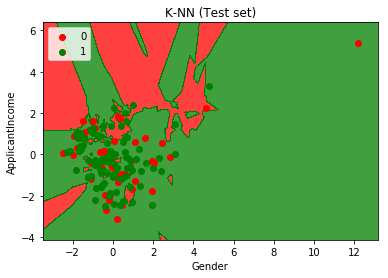

In [35]:
# Visualising the Test set results - Did not run
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Gender')
plt.ylabel('ApplicantIncome')
plt.legend()
plt.show()

In [59]:
#Covariance Estimation 
covMat = NrawData.cov()
print(covMat)

                         ApplicantIncome  CoapplicantIncome     LoanAmount  \
ApplicantIncome             3.212907e+07      -1.670551e+06  226029.825404   
CoapplicantIncome          -1.670551e+06       6.852313e+06   40197.560179   
LoanAmount                  2.260298e+05       4.019756e+04    6481.564505   
Loan_Amount_Term           -4.006195e+03      -9.857739e+02     267.057098   
Gender_Female              -7.103317e+01      -1.569375e+02      -3.058968   
Gender_Male                 7.103317e+01       1.569375e+02       3.058968   
Married_No                 -9.950748e+01      -1.288493e+02      -7.061139   
Married_Yes                 9.950748e+01       1.288493e+02       7.061139   
Dependents_0.0             -3.409632e+02       1.284923e+00      -7.120050   
Dependents_1.0              1.509154e+02      -1.563985e+01       2.639179   
Dependents_2.0             -3.774459e+01       2.827525e+01       1.882024   
Dependents_3.0              2.277923e+02      -1.392033e+01     

In [60]:
#Create Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [61]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [62]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  4  15]
 [ 14 111]]


In [63]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.7986111111111112


In [64]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.10077519379844957


In [65]:
#Covariance Estimation 
covMat = NrawData.cov()
print(covMat)

                         ApplicantIncome  CoapplicantIncome     LoanAmount  \
ApplicantIncome             3.212907e+07      -1.670551e+06  226029.825404   
CoapplicantIncome          -1.670551e+06       6.852313e+06   40197.560179   
LoanAmount                  2.260298e+05       4.019756e+04    6481.564505   
Loan_Amount_Term           -4.006195e+03      -9.857739e+02     267.057098   
Gender_Female              -7.103317e+01      -1.569375e+02      -3.058968   
Gender_Male                 7.103317e+01       1.569375e+02       3.058968   
Married_No                 -9.950748e+01      -1.288493e+02      -7.061139   
Married_Yes                 9.950748e+01       1.288493e+02       7.061139   
Dependents_0.0             -3.409632e+02       1.284923e+00      -7.120050   
Dependents_1.0              1.509154e+02      -1.563985e+01       2.639179   
Dependents_2.0             -3.774459e+01       2.827525e+01       1.882024   
Dependents_3.0              2.277923e+02      -1.392033e+01     

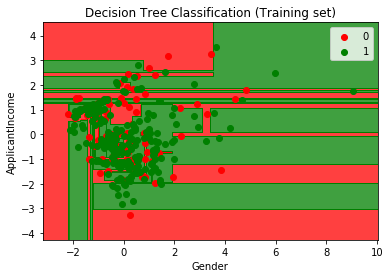

In [43]:
#Visualising the Training set results - Did not run
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Gender')
plt.ylabel('ApplicantIncome')
plt.legend()
plt.show()

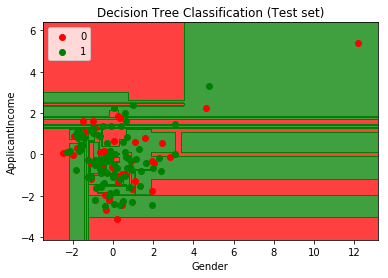

In [44]:
#Visualising the Test set results - did not run
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Gender')
plt.ylabel('ApplicantIncome')
plt.legend()
plt.show()

In [66]:
#Create SVM Classification to the Training set
#Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [67]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [68]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0  19]
 [  0 125]]


In [69]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.8680555555555556


In [70]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.0


In [71]:
#Covariance Estimation
covMat = NrawData.cov()
print(covMat)

                         ApplicantIncome  CoapplicantIncome     LoanAmount  \
ApplicantIncome             3.212907e+07      -1.670551e+06  226029.825404   
CoapplicantIncome          -1.670551e+06       6.852313e+06   40197.560179   
LoanAmount                  2.260298e+05       4.019756e+04    6481.564505   
Loan_Amount_Term           -4.006195e+03      -9.857739e+02     267.057098   
Gender_Female              -7.103317e+01      -1.569375e+02      -3.058968   
Gender_Male                 7.103317e+01       1.569375e+02       3.058968   
Married_No                 -9.950748e+01      -1.288493e+02      -7.061139   
Married_Yes                 9.950748e+01       1.288493e+02       7.061139   
Dependents_0.0             -3.409632e+02       1.284923e+00      -7.120050   
Dependents_1.0              1.509154e+02      -1.563985e+01       2.639179   
Dependents_2.0             -3.774459e+01       2.827525e+01       1.882024   
Dependents_3.0              2.277923e+02      -1.392033e+01     

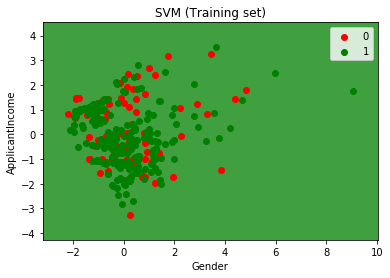

In [52]:
#Visualising the Training set results - did not run
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Gender')
plt.ylabel('ApplicantIncome')
plt.legend()
plt.show()

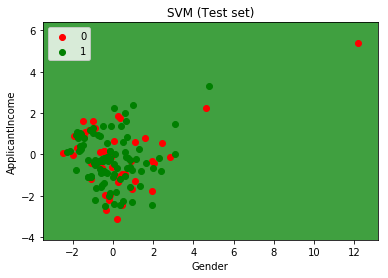

In [53]:
#Visualising the Test set results- Did not run
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Gender')
plt.ylabel('ApplicantIncome')
plt.legend()
plt.show()

In [72]:
#Create and Fitting GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(loss ='deviance', n_estimators = 100, random_state = None)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [73]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [74]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  3  16]
 [ 11 114]]


In [75]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.8125


In [76]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.07867298578199056


In [77]:
#TUNE Knn - Create and Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, weights = 'distance', metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='distance')

In [78]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [79]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [80]:
print(cm)

[[  1  18]
 [  0 125]]


In [81]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.875


In [82]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.08796622097114726


In [ ]:
#Visualising the Training set results - Did Not Run
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Visualising the Test set results - Did Not Run
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [83]:
#Covariance Estimation 
covMat = rawData.cov()
print(covMat)

                   Dependents  ApplicantIncome  CoapplicantIncome  \
Dependents           1.031414     7.450137e+02       7.976977e+01   
ApplicantIncome    745.013661     3.738105e+07      -2.086714e+06   
CoapplicantIncome   79.769770    -2.086714e+06       8.572619e+06   
LoanAmount          14.368055     3.011925e+05       4.790914e+04   
Loan_Amount_Term    -6.615385    -1.825035e+04      -1.147420e+04   
CreditHistory       -0.018295    -3.383925e+01      -1.427318e+00   

                      LoanAmount  Loan_Amount_Term  CreditHistory  
Dependents             14.368055         -6.615385      -0.018295  
ApplicantIncome    301192.495450     -18250.351031     -33.839248  
CoapplicantIncome   47909.140428     -11474.198410      -1.427318  
LoanAmount           7325.190241        222.894173      -0.255510  
Loan_Amount_Term      222.894173       4247.216487       0.029157  
CreditHistory          -0.255510          0.029157       0.133329  


In [84]:
#TUNE Decision Tree model Create Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 3, splitter = 'best', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [85]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [86]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  5  14]
 [ 20 105]]


In [87]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.7638888888888888


In [88]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.09097660601559598


In [89]:
#Covariance Estimation 
covMat = rawData.cov()
print(covMat)

                   Dependents  ApplicantIncome  CoapplicantIncome  \
Dependents           1.031414     7.450137e+02       7.976977e+01   
ApplicantIncome    745.013661     3.738105e+07      -2.086714e+06   
CoapplicantIncome   79.769770    -2.086714e+06       8.572619e+06   
LoanAmount          14.368055     3.011925e+05       4.790914e+04   
Loan_Amount_Term    -6.615385    -1.825035e+04      -1.147420e+04   
CreditHistory       -0.018295    -3.383925e+01      -1.427318e+00   

                      LoanAmount  Loan_Amount_Term  CreditHistory  
Dependents             14.368055         -6.615385      -0.018295  
ApplicantIncome    301192.495450     -18250.351031     -33.839248  
CoapplicantIncome   47909.140428     -11474.198410      -1.427318  
LoanAmount           7325.190241        222.894173      -0.255510  
Loan_Amount_Term      222.894173       4247.216487       0.029157  
CreditHistory          -0.255510          0.029157       0.133329  


In [ ]:
#Visualising the Training set results - Did Not Run
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#Visualising the Test set results - Did Not Run
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [90]:
#Tune SVM Model Create SVM Classification to the Training set
#Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', degree = 3, gamma = 'auto', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [92]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  0  19]
 [  0 125]]


In [93]:
from sklearn.metrics import accuracy_score
# get the accuracy
print(accuracy_score(y_test, y_pred))

0.8680555555555556


In [94]:
from sklearn.metrics import cohen_kappa_score
#get kappa
print(cohen_kappa_score(y_test, y_pred))

0.0


In [95]:
#Covariance Estimation
covMat = rawData.cov()
print(covMat)

                   Dependents  ApplicantIncome  CoapplicantIncome  \
Dependents           1.031414     7.450137e+02       7.976977e+01   
ApplicantIncome    745.013661     3.738105e+07      -2.086714e+06   
CoapplicantIncome   79.769770    -2.086714e+06       8.572619e+06   
LoanAmount          14.368055     3.011925e+05       4.790914e+04   
Loan_Amount_Term    -6.615385    -1.825035e+04      -1.147420e+04   
CreditHistory       -0.018295    -3.383925e+01      -1.427318e+00   

                      LoanAmount  Loan_Amount_Term  CreditHistory  
Dependents             14.368055         -6.615385      -0.018295  
ApplicantIncome    301192.495450     -18250.351031     -33.839248  
CoapplicantIncome   47909.140428     -11474.198410      -1.427318  
LoanAmount           7325.190241        222.894173      -0.255510  
Loan_Amount_Term      222.894173       4247.216487       0.029157  
CreditHistory          -0.255510          0.029157       0.133329  


In [ ]:
#Visualising the Training set results - Did Not Run
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
#Visualising the Test set results - Did Not Run
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()